In [1]:
import shapefile
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline

In [2]:
allRoadPoints = []
allRoadTypes = []
allRoadLengths = []

# fn to get points from a shape variable
def getVillagepoints(shpVar):
    return [shpVar.shape(i).points[0] for i in range(len(shpVar.shapes()))]

# fn to display any point given index
def displaypoints(points): 
    x = [pt[0] for pt in points]
    y = [pt[1] for pt in points]
    hnd, = plt.plot(x,y,'ko',label="Villages")
    return hnd
    
# fn to get fields and records of a shape variable
def getFieldsAndRecords(shpVar):
    return shpVar.fields, shpVar.records()

# fn to display all points of a road
def addRoadPoints(recIndex,rdShapes):
    global allRoadPoints
    print('%d Points of %d road' %(len(rdShapes.shape(recIndex).points),recIndex+1),rdShapes.shape(recIndex).points)
    allRoadPoints.append(rdShapes.shape(recIndex).points)
    
# plotting pts to see if they make a road
def plotRoadPoints(points, types, villCoords):
    i = 0
    plt.figure(figsize=(20,20))
    for l in points:
        x = [t[0] for t in l]
        y = [t[1] for t in l]
        tp = types[i]
        if(tp == 1): hnd1, = plt.plot(x,y,color='blue',label="Major Roads")
        elif(tp == 2): hnd2, = plt.plot(x,y,color='yellowgreen',label="Minor Roads")
        elif(tp == 3): hnd3, = plt.plot(x,y,color='coral',label="Muddy Roads")
        i += 1
    hnd4 = displaypoints(villCoords)
    plt.legend(handles=[hnd1, hnd2, hnd3, hnd4],fontsize=20)
    plt.show()
    
# fn to display road details given index 
def showroadDetails(rdFields, rdRec, rdShapes):
    for index in range(len(rdRec)):
        for i in range(len(rdFields)-1):
            if('Name' in rdFields[i+1][0]): 
                if('MR' in rdRec[index][i]):
                    allRoadTypes.append(1)
                elif('Minor' in rdRec[index][i]):
                    allRoadTypes.append(2)
                else:
                    allRoadTypes.append(3)
            print(rdFields[i+1][0]," : ",rdRec[index][i])
            if('Shape_Leng' in rdFields[i+1][0]):
                allRoadLengths.append(rdRec[index][i])
        addRoadPoints(index,rdShapes)
        print("=================================================================================================")   

# fn to find the distances of every village from every single point in each road
def findDistances(villCoords):
    allVillagesDist = {}
    i = 1
    for vlg in villCoords:
        d = []
        vx = vlg[0]
        vy = vlg[1]
        for rd in allRoadPoints:
            dist = []
            for rdpt in rd:
                rx = rdpt[0]
                ry = rdpt[1]
                dist.append(sqrt((ry-vy)**2+(rx-vx)**2))
            d.append(dist)
        allVillagesDist[i] = d
        i+=1
    return allVillagesDist

# fn to find n closest roads to a village
def findClosestn(road, allVillagesDist, rdRec, n=5):
    villMins = {}
    _,rdRecCopy = getFieldsAndRecords(road)

    for key in allVillagesDist.keys():
        minDist = []
        d = allVillagesDist[key]
        for dist in d:
            minDist.append(min(dist))
        temp = []
        for k in range(n):
            minVal = min(minDist)
            minValIndex = minDist.index(minVal)
            l = [minVal, rdRec.index(rdRecCopy[minValIndex]), rdRecCopy[minValIndex][4]]
            if 'MR' in rdRecCopy[minValIndex][0]:
                l.append(1)
            elif 'Minor' in rdRecCopy[minValIndex][0]:
                l.append(2)
            else:
                l.append(3)
            temp.append(l)
            rdRecCopy.remove(rdRecCopy[minValIndex])
            minDist.remove(minVal)
        villMins[key] = temp
        _,rdRecCopy = getFieldsAndRecords(road)
    return villMins

# fn to plot closest n roads with their villaes
def plotClosestn(rdShape, villMin, points):
    selectedRoads = []
    selectedTypes = []
    for k in villMins.keys():
        sl = []
        indices = [t[1] for t in villMins[k]]
        types = [t[3] for t in villMins[k]]
        for i in indices:
            sl.append(road.shape(i).points)
        selectedRoads.append(sl)
        selectedTypes.append(types)
    i = 1
    plt.figure(figsize=(20,20))
    for vRoads in selectedRoads:
        for rd in vRoads:
            x = [t[0] for t in rd]
            y = [t[1] for t in rd]
            rand = random.randint(100000,999999)
            hnd1, = plt.plot(x,y,color='#'+str(rand), label="roads")
            hnd2, = plt.plot(villCoords[i-1][0], villCoords[i-1][1], 'ko', label="Villages")
        plt.legend(handles=[hnd1, hnd2])
        i += 1
    plt.show()


In [3]:
road = shapefile.Reader("Data/Road_Network.shp")
vill = shapefile.Reader("Data/Villages.shp")

In [4]:
villCoords = getVillagepoints(vill)

In [5]:
rdFields, rdRec = getFieldsAndRecords(road)

In [6]:
showroadDetails(rdFields, rdRec, road)

Name  :  MR1
PREFIX  :  Dharampur Chauk
PRE_Type  :  Chauk
SUFFIX  :  Race Course End
FULL_NAME  :  Race Course to Dharampur Road
Oneway  :  T
Shape_Leng  :  78.307448375
FT_SpeedLi  :  80
TF_SpeedLi  :  80
FT_Time  :  0.0587305862812
TF_Time  :  0.0587305862812
3 Points of 1 road [(216094.7971999999, 3356367.9661), (216083.13410000037, 3356324.9970999993), (216084.36180000007, 3356291.2357)]
Name  :  MR2
PREFIX  :  Dhrampur Chauk
PRE_Type  :  Chauk
SUFFIX  :  River End
FULL_NAME  :  Dharampur Road
Oneway  :  F
Shape_Leng  :  1622.69599276
FT_SpeedLi  :  80
TF_SpeedLi  :  80
FT_Time  :  1.21702199457
TF_Time  :  1.21702199457
43 Points of 2 road [(216084.36180000007, 3356291.2357), (216091.7279000003, 3356239.0591), (216092.9556, 3356217.5746), (216096.09190000035, 3356189.7958000004), (216097.2525000004, 3356179.5163000003), (216099.66949999984, 3356162.9042000007), (216099.20909999963, 3356147.2512), (216101.97140000015, 3356130.217), (216101.30420000013, 3356113.2015000004), (216101

TF_SpeedLi  :  26
FT_Time  :  0.0817385960803
TF_Time  :  0.0817385960803
3 Points of 138 road [(216521.0488, 3355793.3477), (216508.04839999974, 3355776.5908000004), (216499.33710000012, 3355765.362299999)]
Name  :  Street
PREFIX  :  strart End
PRE_Type  :  
SUFFIX  :  
FULL_NAME  :  Street75
Oneway  :  FT
Shape_Leng  :  123.268991302
FT_SpeedLi  :  26
TF_SpeedLi  :  26
FT_Time  :  0.284466903004
TF_Time  :  0.284466903004
9 Points of 139 road [(216502.58299999963, 3355762.9068), (216493.61429999955, 3355753.5721000005), (216486.0683000004, 3355743.5692999996), (216473.8049999997, 3355727.3133000005), (216462.48840000015, 3355735.8585), (216451.23170000035, 3355744.3585), (216468.7374999998, 3355766.4712000005), (216473.8049999997, 3355765.0891999993), (216482.06819999963, 3355778.4263000004)]
Name  :  Street
PREFIX  :  
PRE_Type  :  
SUFFIX  :  
FULL_NAME  :  Street76
Oneway  :  FT
Shape_Leng  :  69.8505030563
FT_SpeedLi  :  26
TF_SpeedLi  :  26
FT_Time  :  0.161193468592
TF_Time  : 

FT_Time  :  0.212085245201
TF_Time  :  0.212085245201
5 Points of 249 road [(216832.69049999956, 3356080.0590000004), (216868.2823999999, 3356062.9170999993), (216854.00129999965, 3356031.5908000004), (216849.8552000001, 3356025.6019), (216855.84399999958, 3356012.7028)]
Name  :  Street
PREFIX  :  Dhram
PRE_Type  :  
SUFFIX  :  Street End
FULL_NAME  :  Street431
Oneway  :  
Shape_Leng  :  31.5457179113
FT_SpeedLi  :  35
TF_SpeedLi  :  35
FT_Time  :  0.0540783735622
TF_Time  :  0.0540783735622
3 Points of 250 road [(216826.36039999966, 3356046.7931999993), (216841.56909999996, 3356038.4285000004), (216854.00129999965, 3356031.5908000004)]
Name  :  Street
PREFIX  :  Dhram
PRE_Type  :  
SUFFIX  :  Street End
FULL_NAME  :  Street432
Oneway  :  
Shape_Leng  :  35.2928790812
FT_SpeedLi  :  35
TF_SpeedLi  :  35
FT_Time  :  0.0605020784249
TF_Time  :  0.0605020784249
4 Points of 251 road [(216841.56909999996, 3356038.4285000004), (216838.33810000028, 3356026.5232999995), (216827.7424999997, 33

4 Points of 360 road [(217307.23809999973, 3355322.6324000005), (217321.81099999975, 3355296.8467999995), (217327.33920000028, 3355287.0188999996), (217333.4815999996, 3355276.5768)]
Name  :  Street
PREFIX  :  
PRE_Type  :  
SUFFIX  :  Street End
FULL_NAME  :  Street276
Oneway  :  TF
Shape_Leng  :  189.937569536
FT_SpeedLi  :  34
TF_SpeedLi  :  34
FT_Time  :  0.335183946241
TF_Time  :  0.335183946241
19 Points of 361 road [(217106.21229999978, 3355371.17), (217122.79679999966, 3355379.155200001), (217129.5535000004, 3355381.6120999996), (217137.53859999962, 3355382.8406000007), (217143.06680000015, 3355376.6982000005), (217154.33990000002, 3355379.5164), (217157.8086000001, 3355380.3836000003), (217163.95100000035, 3355384.0691), (217170.09339999966, 3355388.982999999), (217173.77880000044, 3355396.9682), (217178.07849999983, 3355405.567500001), (217179.30700000003, 3355415.3954000007), (217181.76400000043, 3355423.9947999995), (217183.60670000035, 3355435.0511000007), (217187.29220000

Name  :  Street
PREFIX  :  
PRE_Type  :  
SUFFIX  :  
FULL_NAME  :  Street193
Oneway  :  FT
Shape_Leng  :  80.0466797781
FT_SpeedLi  :  27
TF_SpeedLi  :  27
FT_Time  :  0.177881510618
TF_Time  :  0.177881510618
3 Points of 472 road [(216337.31060000043, 3355191.3880000003), (216279.72149999999, 3355242.5404000003), (216277.46339999977, 3355244.5461)]
Name  :  Street
PREFIX  :  
PRE_Type  :  
SUFFIX  :  
FULL_NAME  :  Street194
Oneway  :  
Shape_Leng  :  38.0347796984
FT_SpeedLi  :  27
TF_SpeedLi  :  27
FT_Time  :  0.084521732663
TF_Time  :  0.084521732663
2 Points of 473 road [(216369.92399999965, 3355231.74), (216400.11980000045, 3355208.613)]
Name  :  Street
PREFIX  :  
PRE_Type  :  
SUFFIX  :  
FULL_NAME  :  Street195
Oneway  :  
Shape_Leng  :  36.6379864798
FT_SpeedLi  :  27
TF_SpeedLi  :  27
FT_Time  :  0.0814177477329
TF_Time  :  0.0814177477329
2 Points of 474 road [(216353.47649999987, 3355211.3905999996), (216383.1897, 3355189.9553999994)]
Name  :  Street
PREFIX  :  
PRE_Type 

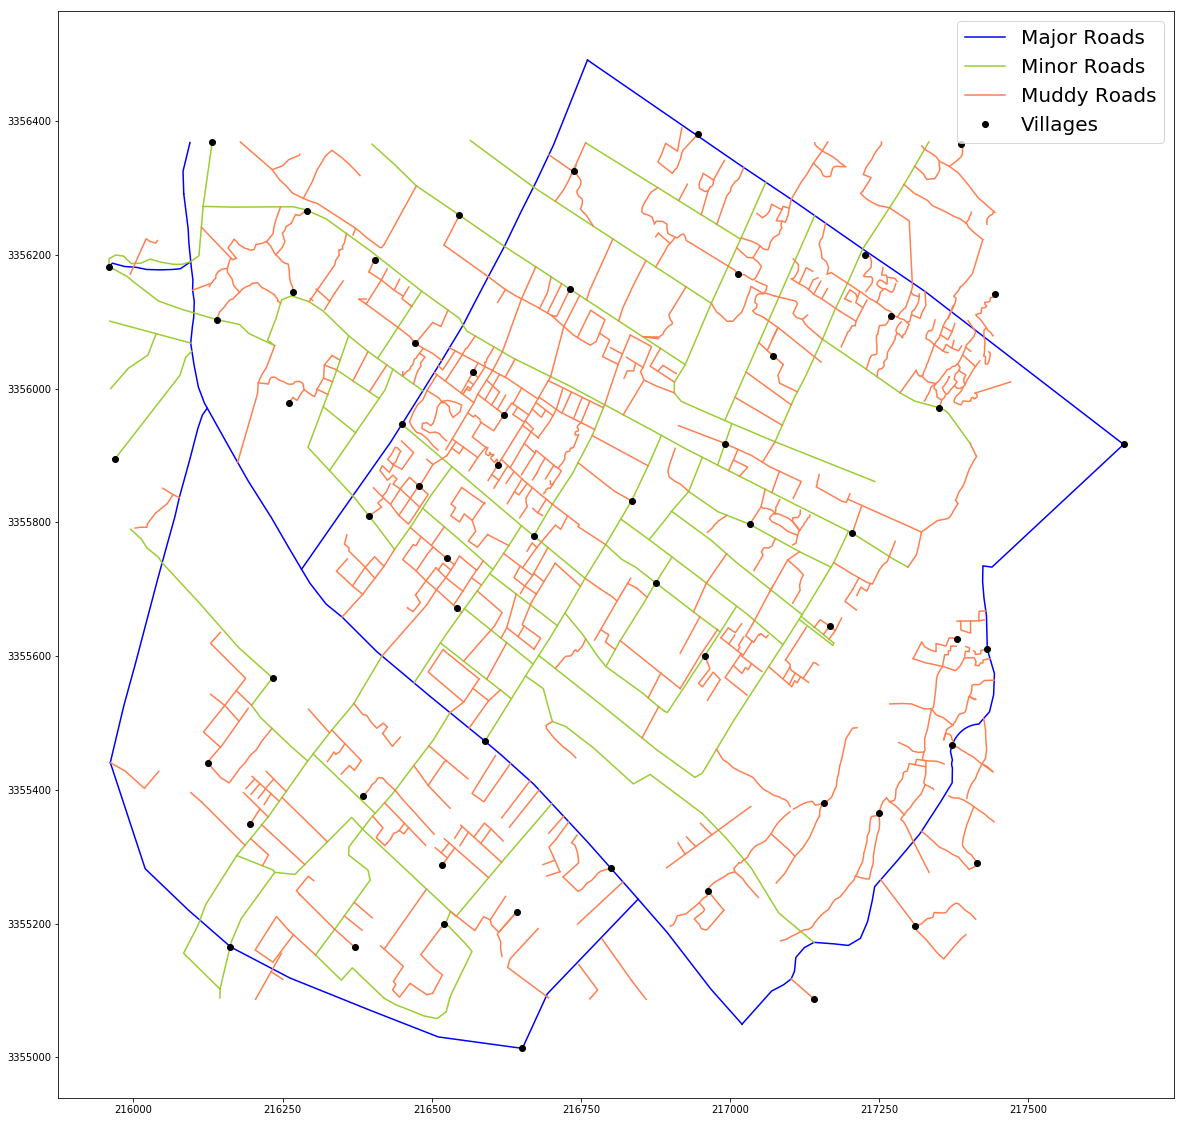

In [7]:
plotRoadPoints(allRoadPoints, allRoadTypes, villCoords)

In [8]:
len([x for x in allRoadTypes if x==1]), len([x for x in allRoadTypes if x==2]), len([x for x in allRoadTypes if x==3]), len([x for x in allRoadTypes if x==1]) + len([x for x in allRoadTypes if x==2]) + len([x for x in allRoadTypes if x==3])

(8, 57, 476, 541)

In [9]:
allVillagesDist = findDistances(villCoords)

In [10]:
villMins = findClosestn(road, allVillagesDist, rdRec, 4)

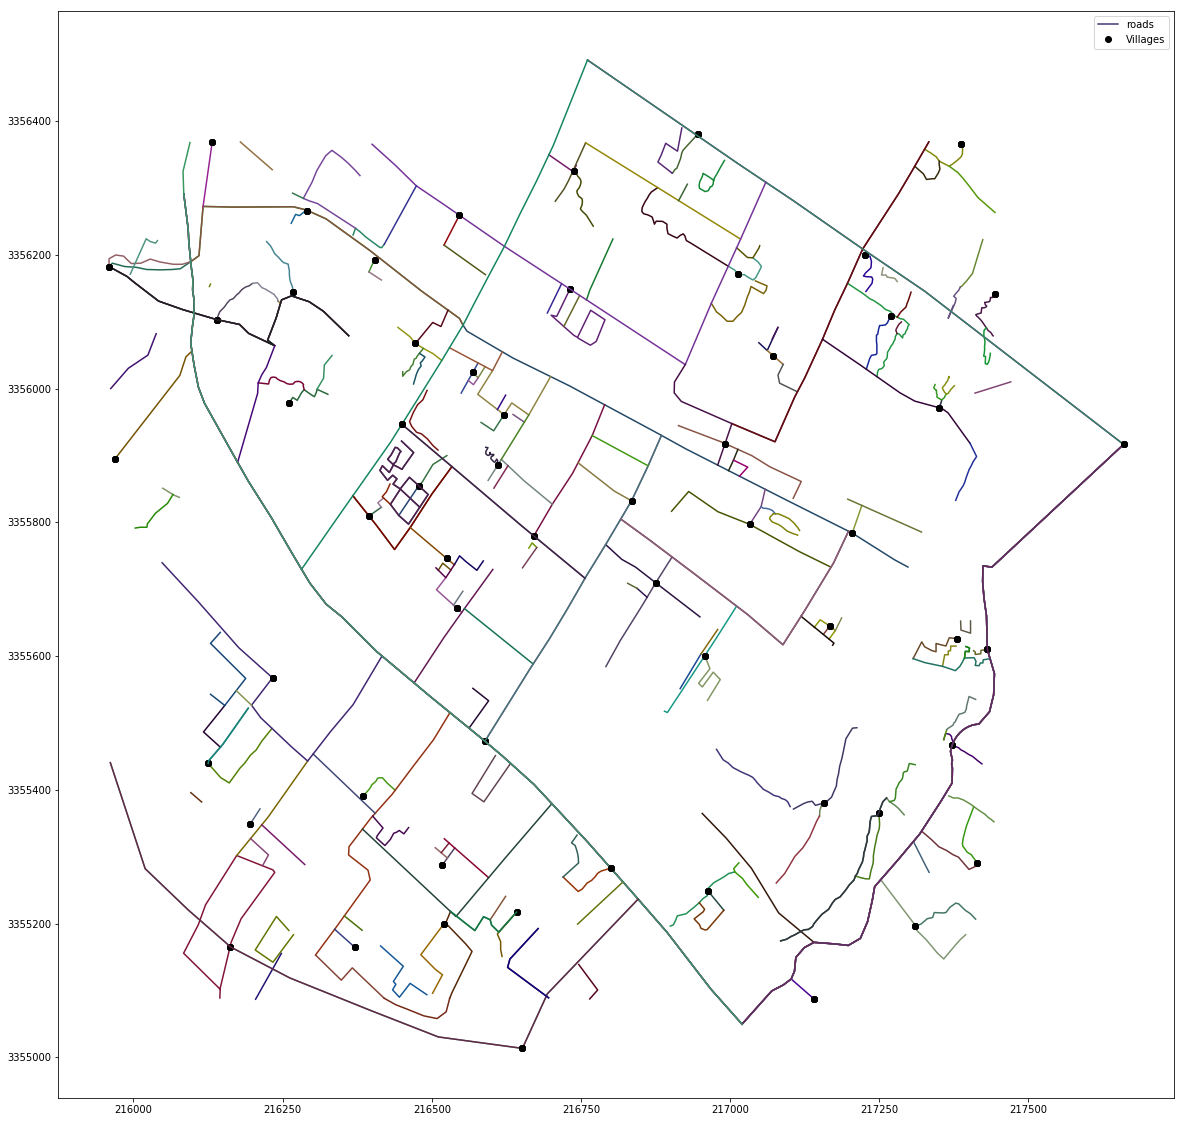

In [11]:
plotClosestn(road, villMins, villCoords)